## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rand

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge and Clean Data

In [29]:
# Combine the data into a single dataset
mouse_study_data = mouse_metadata.merge(study_results, how ="outer", on ="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
mouse_study_data['Mouse ID'].nunique()

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_data_dup = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID','Timepoint',], keep=False)]['Mouse ID']
print(mouse_study_data_dup)

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_conflict_df = mouse_study_data.iloc[list(mouse_study_data_dup.index)]
mouse_conflict_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Drop mouse with conflict information

In [43]:
mouse_to_drop = mouse_conflict_df['Mouse ID'].unique()
list(mouse_to_drop)

['g989']

In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_study_data_clea = mouse_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep=False)
mouse_study_data_clea = mouse_study_data[mouse_study_data['Mouse ID'] != 'g989']
mouse_study_data_clea.reset_index(drop=True).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_study_data_clea['Mouse ID'].nunique()

248

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create list of list of [mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen]
list_stat_1=[[drug,
            mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Tumor Volume (mm3)'].mean(),
            mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Tumor Volume (mm3)'].median(),
            mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Tumor Volume (mm3)'].var(),
            mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Tumor Volume (mm3)'].std(),
            mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Tumor Volume (mm3)'].sem()] 
            for drug in list(mouse_study_data_clea['Drug Regimen'].unique())
          ]

# Create Column
col=['Drug Regimen', 'Mean Tumor (mm3)', 'Median Tumor (mm3)',
    'Varian Tumor (mm3)', 'STD Tumor (mm3)', 'SEM Tumor (mm3)']

# Setup DataFrame
stat_1_df = pd.DataFrame(list_stat_1, columns=col)

# Format and Sort Data
stat_1_df.round({'Mean Tumor (mm3)': 3,
                 'Median Tumor (mm3)': 3,
                 'Varian Tumor (mm3)': 3,
                 'STD Tumor (mm3)': 3,
                 'SEM Tumor (mm3)': 3
                }).set_index('Drug Regimen').sort_index(ascending = True)


,Mean Tumor (mm3),Median Tumor (mm3),Varian Tumor (mm3),STD Tumor (mm3),SEM Tumor (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Create statistics DataFrames
stat_2_df = mouse_study_data_clea.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stat_2_df.columns = stat_2_df.columns.droplevel(0)

# rename columns
stat_2_df=stat_2_df.rename(columns={'mean': 'Mean Tumor (mm3)',
                            'median':'Median Tumor (mm3)',
                            'var':'Varian Tumor (mm3)',
                            'std':'STD Tumor (mm3)',
                            'sem':'SEM Tumor (mm3)'
                           })

# Format and Sort Data
stat_2_df.round({'Mean Tumor (mm3)': 3,
                 'Median Tumor (mm3)': 3,
                 'Varian Tumor (mm3)': 3,
                 'STD Tumor (mm3)': 3,
                 'SEM Tumor (mm3)': 3
                }).sort_index(ascending = True)


,Mean Tumor (mm3),Median Tumor (mm3),Varian Tumor (mm3),STD Tumor (mm3),SEM Tumor (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [11]:
# set chart label
chart_title = "Number of Mice per Regiment"
x_label = "Drug Regimen"
y_label = "Number of Mice"

In [12]:
# create DataFrame for the Drug regiment and number of test subjects.
# sort value base on number test
drug_v_mou_list = [[drug, mouse_study_data_clea.loc[mouse_study_data_clea['Drug Regimen']==drug,'Mouse ID'].count()] 
            for drug in list(mouse_study_data_clea['Drug Regimen'].unique())]

drug_v_mou_df = pd.DataFrame(drug_v_mou_list, columns=['Drug Regimen', 'Number of Mice']).sort_values(by='Number of Mice', ascending = False)

drug_v_mou_df=drug_v_mou_df.reset_index(drop=True)

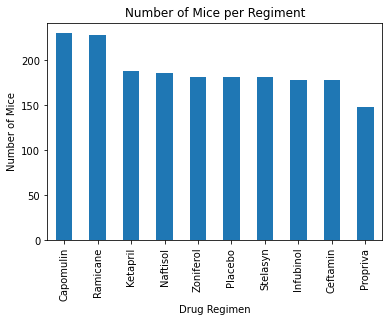

In [13]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 
ax1 = drug_v_mou_df.plot.bar(x='Drug Regimen',y='Number of Mice',legend= False);
ax1.set(xlabel = x_label,
        ylabel = y_label,
        title = chart_title
       );

Text(0, 0.5, 'Number of Mice')

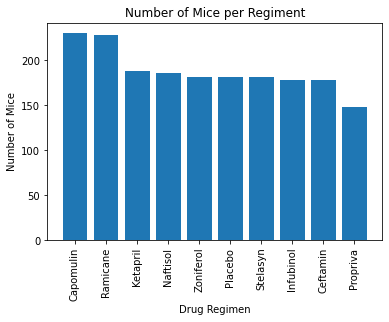

In [14]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_v_mou_df.index))
tick = drug_v_mou_df['Drug Regimen']
plt.bar(x_axis, drug_v_mou_df['Number of Mice']);
plt.xticks(x_axis,tick, rotation = "vertical");

plt.title(chart_title)
plt.xlabel(x_label)
plt.ylabel(y_label)

#Create DataFrame for Males vs Females

In [15]:
gen_list_count = [[gen, mouse_study_data_clea.loc[mouse_study_data_clea['Sex']== gen,'Mouse ID'].count()] 
            for gen in list(mouse_study_data_clea['Sex'].unique())]
gen_list = ['Sex', 'Number of Mice']
gen_df= pd.DataFrame(gen_list_count, columns = ['Sex', 'Number of Mice'])


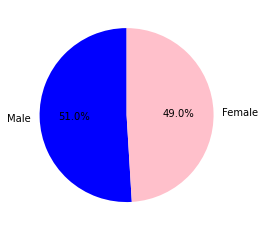

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_index_df = gen_df.copy()
gen_index_df = gen_index_df.set_index('Sex', drop = True)
ax = gen_index_df.plot.pie(y='Number of Mice',
                     autopct = "%1.1f%%",
                     legend = False,
                     startangle = 90,
                     colors = ["blue", "pink"]
                    )
ax.set(ylabel="");

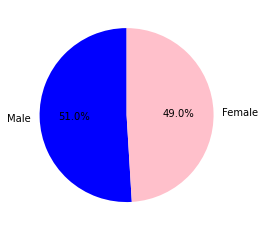

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gen_df['Number of Mice'], 
        labels=gen_df['Sex'],
        autopct="%1.1f%%",
        startangle = 90,
        colors = ["blue", "pink"]
       );


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# group dataFrame by regiment and Timepoint
regi_time_df = mouse_study_data_clea.copy()

# mean value by 'Drug Regimen' and 'Timepoint'
regi_time_df_mean = regi_time_df.groupby(['Drug Regimen','Timepoint']).mean()

# # Max timepoint for each regiment
regi_timemax = regi_time_df.groupby(['Drug Regimen'])['Timepoint'].max()
regi_timemax = list(regi_timemax.loc[four_drug_list])

# locate valume of each regiment at max timepoint
last_tumer_vol = [round(regi_time_df_mean.loc[four_drug_list[i],regi_timemax[i]]['Tumor Volume (mm3)'],3) for i in range(len(four_drug_list))]

# Print out the final valume
final_tumer_size = pd.DataFrame({'Drug Regimen':four_drug_list,
                                 'Fianl Tumer Vol (mm3)' :last_tumer_vol
                                })

# final_tumer_size=final_tumer_size.set_index('Drug Regimen').sort_values(by='Fianl Tumer Vol (mm3)',ascending=True)
final_tumer_size

,Drug Regimen,Fianl Tumer Vol (mm3)
0,Capomulin,36.236
1,Ramicane,34.956
2,Infubinol,65.756
3,Ceftamin,64.132


### Interquartile range (IQR)

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
iqr_df = final_tumer_size.copy()
# drug_list = iqr_df['Drug Regimen']
drug_list = iqr_df.index.tolist()
# list of tumer data
tumer_data = iqr_df['Fianl Tumer Vol (mm3)']

#  define Quantile
lowerq, median, upperq = round(tumer_data.quantile([.25,.5,.75]),3)
iqr = upperq - lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound = round(lowerq - (1.5*iqr),3)
upper_bound = upperq + (1.5*iqr)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset # Determine outliers using upper and lower bounds
# outlier_list = [tumer_data, if tumer_data > upper_bound | tumer_data < lower_bound]
outlier_list = list([outlier for outlier in tumer_data if outlier > upper_bound or outlier<lower_bound])
# outlier_list = [outlier for outlier in tumer_data]
print(f"The lower quartile of tumor sizes is: {lowerq}")
print(f"The upper quartile of tumor sizes is: {upperq}")
print(f"The interquartile range of tumor sizes is: {iqr}")
print(f"The the median of tumor sizes is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# outlier are:
print("=============")
print("Outliers are:")

if len(outlier_list)==0:
    print('there is no outlier')
else:
    [print(iqr_df.loc[iqr_df['Fianl Tumer Vol (mm3)']== i]) for i in outlier_list]



The lower quartile of tumor sizes is: 35.916
The upper quartile of tumor sizes is: 64.538
The interquartile range of tumor sizes is: 28.622
The the median of tumor sizes is: 50.184 
Values below -7.017 could be outliers.
Values above 107.471 could be outliers.
Outliers are:
there is no outlier


In [20]:
box_plot_df = final_tumer_size.sort_values(by=['Fianl Tumer Vol (mm3)'])
box_plot_df

,Drug Regimen,Fianl Tumer Vol (mm3)
1,Ramicane,34.956
0,Capomulin,36.236
3,Ceftamin,64.132
2,Infubinol,65.756


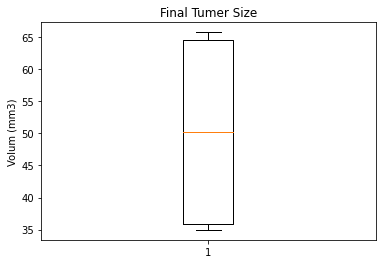

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = final_tumer_size.sort_values(by=['Fianl Tumer Vol (mm3)'])

fig1, ax1 = plt.subplots()
ax1.set(title='Final Tumer Size',
        ylabel='Volum (mm3)'
        )
ax1.boxplot(box_plot_df['Fianl Tumer Vol (mm3)'])
plt.show()

# Line and Scatter Plots

In [22]:
mouse_study_data_clea.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# mouse_study_data_clea['Drug Regimen'].unique()

####  RANDOM SELECT 1 MOUSE AND PLOT TUMOR FOR Capomulin

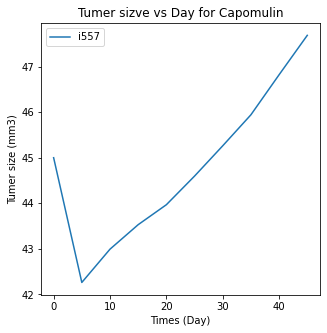

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = mouse_study_data_clea.copy()
drug = 'Capomulin'

# Generate a list of mice that was treated with Capomulin
mouse_list = list(line_df.loc[line_df['Drug Regimen'] == drug]['Mouse ID'].unique())
# random select a mouse
mouse = rand.choice(mouse_list)

# timepoint and tumer volum
timepoint_df = line_df.loc[line_df['Mouse ID'] == mouse, ['Timepoint', 'Tumor Volume (mm3)']]

fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.plot(timepoint_df['Timepoint'],timepoint_df['Tumor Volume (mm3)'], label=f'{mouse}')
ax2.set(xlabel='Times (Day)',
        ylabel='Tumer size (mm3)',
        title= f'Tumer sizve vs Day for {drug}')
ax2.legend();


### Scatter Plot

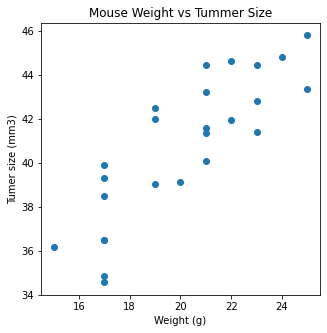

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = mouse_study_data_clea.copy()
# scatter_df = scatter_df.groupby(['Drug Regimen','Timepoint'])
drug = 'Capomulin'
# plot_df = scatter_df.mean()
# plot_df = plot_df.loc[drug,:]
plot_df = scatter_df.loc[scatter_df['Drug Regimen']==drug,:]

plot_df = plot_df.groupby('Mouse ID')
mean_vol = plot_df['Tumor Volume (mm3)'].mean()
mean_wei = plot_df['Weight (g)'].mean()

fig3, ax3 = plt.subplots(figsize=(5,5))
ax3.scatter(mean_wei,mean_vol)
ax3.set(xlabel='Weight (g)',
        ylabel='Tumer size (mm3)',
        title= 'Mouse Weight vs Tummer Size');

# Correlation and Regression

### Calculate the correlation coefficient and linear regression model

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# find components of the linear regression
vc_slope, vc_int, r_val, p_val, std_err = st.linregress(mean_wei, mean_vol)

vc_slope=round(vc_slope,3)
vc_int= round(vc_int,3)

# Create equation of line to calculate predicted weight vs Tumer Volum
vc_fit = vc_slope * mean_wei + vc_int

### Plot Linear regression line with the scatter point

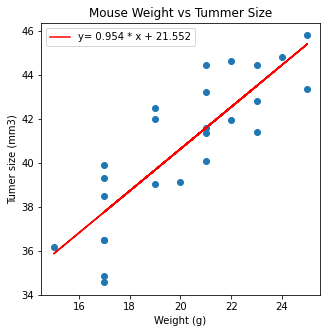

In [27]:
fig4, ax4 = plt.subplots(figsize=(5,5))
ax4.scatter(mean_wei,mean_vol)
ax4.set(xlabel='Weight (g)',
        ylabel='Tumer size (mm3)',
        title= 'Mouse Weight vs Tummer Size');
ax4.plot(mean_wei,vc_fit, label=f'y= {vc_slope} * x + {vc_int}', color='r');
ax4.legend();

In [28]:
print(f'R^2 is : {round(r_val**2,2)}')
print(f'PValue is : {round(p_val,3)}')

R^2 is : 0.71
PValue is : 0.0


# OBSERVATION

##### OBSERVATION 1-SELECTING RANDOM MOUSE AND PLOT THE TUMER SIZE VS TIME FOR DRUG CAPOMULIN.

It appears that the tumors were shrinking and expanding during the treatment periods. However, for 40+ days, the graphs show a promising shrinking trend. It is hard to draw any conclusion on this graph alone as other factures such as weight, amounts of doses, genders might play some roles in the shrining and growing of the tumors.

##### OBSERVATION 2: Plot Linear regression line with the scatter point
There is a strong correlation between the weights of the mouses and the tumor sizes. The higher the weight, the larger the tumors. 

##### OBSERVATION 3
Based on "Mean tumor" in the "Summary of Statistics" section. Capomulin and Ramicane are far more promising than other drug regiments. The mean tumor sizes are more than 20% smaller than other drugs. 